In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.transforms as transforms
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler

In [19]:
C1 =  5
C2 =  -3
S1 =  3
S2 =  2
theta = 55
N = 300

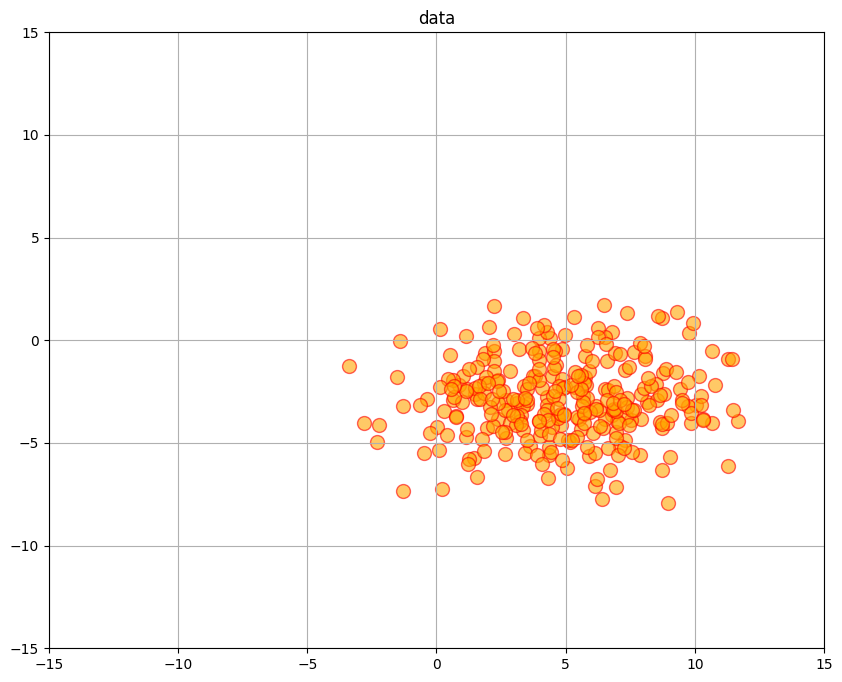

In [81]:
theta = np.pi*theta/180
Centers = np.array([C1,C2])
Sigmas = np.array([S1,S2])

# Матрица поворота
R = np.array([[np.cos(theta), - np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

X = R @ np.diag(Sigmas) @ np.random.randn(2, N)+np.diag(Centers)@ np.ones((2, N))

fig = plt.figure(figsize=(10,8))
plt.scatter(X[0,:],X[1,:], alpha = 0.6, label = 'data',s = 100, c = 'orange', edgecolor = 'r')
plt.grid()
plt.xlim((-15,15))
plt.ylim((-15,15))
plt.title('data');


In [7]:
X.shape

(2, 300)

In [13]:
X[0].shape

(300,)

In [21]:
pca = PCA(n_components=2)
pca.fit(X.T)
pca_result = pca.transform(X.T)

Eigen_Vectors = pca.components_
Eigen_Values = pca.explained_variance_

In [22]:
X_mean = np.mean(X, axis = 1)
theta_ = 2 * np.pi * np.arange(0,1,0.01)
X_std = Eigen_Vectors[[1,0]] @ np.diag(np.sqrt(Eigen_Values[[1,0]])) @ np.array([np.cos(theta_),np.sin(theta_)])

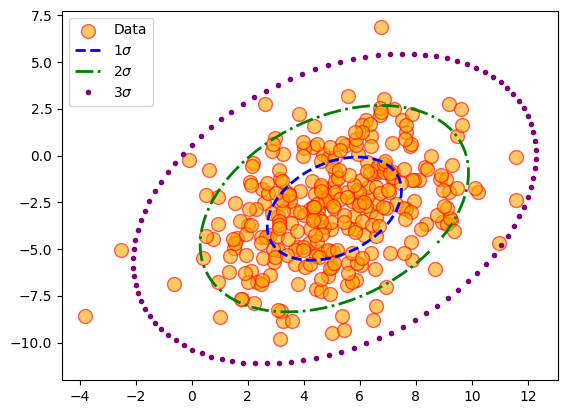

In [31]:
# Your plotting code
plt.scatter(X[0,:], X[1,:], alpha=0.6, label='Data', s=100,
            c='orange', edgecolor='r')
# Plot 1-sigma line
plt.plot(X_std[0,:] + X_mean[0], X_std[1,:] + X_mean[1], '--',
         c='blue', linewidth=2, label=r'$1\sigma$')
# Plot 2-sigma line
plt.plot(2*X_std[0,:] + X_mean[0], 2*X_std[1,:] + X_mean[1], '-.',
         c='green', linewidth=2, label=r'$2\sigma$')
# Plot 3-sigma line
plt.plot(3*X_std[0,:] + X_mean[0], 3*X_std[1,:] + X_mean[1], '.',
         c='purple', linewidth=2, label=r'$3\sigma$')
# Add legend
plt.legend(loc='best')
# Show the plot
plt.show()


In [11]:
def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

In [32]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None

    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)

    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean

    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)

        cov_matrix = np.cov(x - self.mean, rowvar=False)

        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T

        self.sorted_components = np.argsort(self.eigen_values)[::-1]

        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]
        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

In [40]:
label0=np.array(X[0])
label=np.array(X[1])
data = pd.DataFrame({'label': label, 'label0': label0},
                    columns=['label', 'label0'])

data.shape

(300, 2)

In [41]:
std = StandardScaler()
transformed = StandardScaler().fit_transform(data)

In [42]:
pca = convers_pca(no_of_components=2)
pca.fit(transformed)

In [44]:
data_exp=pca.explained_variance_ratio
data_exp

array([0.67442671, 0.32557329])

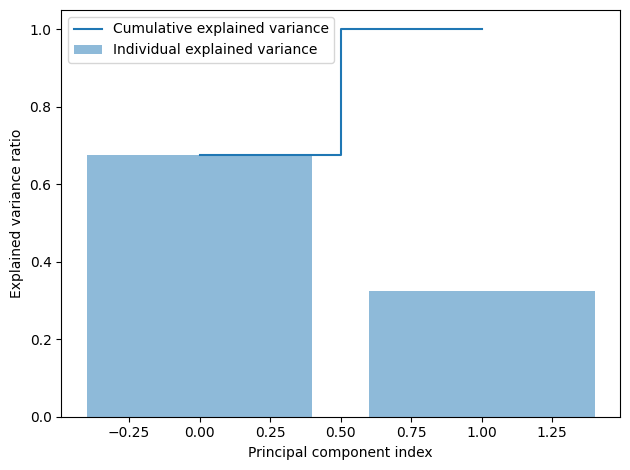

In [45]:
cum_sum_exp = np.cumsum(data_exp)
plt.bar(range(0,len(data_exp)), data_exp, alpha=0.5,
        align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp,
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [48]:
print("eigenvalues: ",pca.eigen_values)
print("eigenvectors: ")
display(pca.eigen_vectors)

eigenvalues:  [1.35336465 0.65332432]
eigenvectors: 


array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

find the projections of signs on eigenvectors (through scalar product)

In [49]:
useful_pc = pca.eigen_vectors[:,:2] #keeping only the first 2 eigenvectors
principle_data = np.dot(data.values, useful_pc)#dot product of the two terms
print(principle_data[:5])

[[-6.6349147   2.41629073]
 [-5.89538306  4.18830736]
 [-7.14941798 -4.03098579]
 [-3.47950682  4.30212633]
 [-4.58029636 -2.43567349]]


In [54]:
# Create dataframe
pca_df = pd.DataFrame(
    data=principle_data,
    columns=['PCA1', 'PCA2'])
pca_df

,PCA1,PCA2
0,-6.634915,2.416291
1,-5.895383,4.188307
2,-7.149418,-4.030986
3,-3.479507,4.302126
4,-4.580296,-2.435673
...,...,...
295,-4.930108,-0.552569
296,-7.789756,2.962436
297,-6.104873,2.571673
298,-7.654802,5.027028


In [55]:
import plotly.express as px

px.scatter(data_frame=pca_df, x='PCA1', y='PCA2')